In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [27]:
df_fake = pd.read_csv('True.csv')
df_true = pd.read_csv('Fake.csv')

In [33]:
df_fake.head()


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",fake
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",fake
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",fake
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",fake
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",fake


In [34]:
df_true.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",real
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",real
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",real
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",real
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",real


In [35]:
df_fake.describe()

,title,text,subject,date,label
count,21417,21417,21417,21417,21417
unique,20826,21192,2,716,1
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017",fake
freq,14,8,11272,182,21417


In [36]:
df_true.describe()

,title,text,subject,date,label
count,23481,23481,23481,23481,23481
unique,17903,17455,6,1681,1
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017",real
freq,6,626,9050,46,23481


In [29]:
df_fake['label'] = 'fake'
df_true['label'] = 'real'

In [37]:
news = pd.concat([df_fake, df_true])
news["Article"] = news["title"] + news["text"]
news.sample(frac = 1) 

,title,text,subject,date,label,Article
910,Hannity Throws A Complete Hissy Fit After Con...,After all of the conspiracy theories and lies ...,News,"July 7, 2017",real,Hannity Throws A Complete Hissy Fit After Con...
4334,"At U.S.-China summit, Trump presses Xi on trad...","PALM BEACH, Fla. (Reuters) - President Donald ...",politicsNews,"April 7, 2017",fake,"At U.S.-China summit, Trump presses Xi on trad..."
21776,RADICAL LEFTIST WHO DISMISSED CHARGES AGAINST ...,We re not sure which of Judge Mary Murguia s q...,left-news,"May 5, 2015",real,RADICAL LEFTIST WHO DISMISSED CHARGES AGAINST ...
8019,From prairie to the White House: Inside a Trib...,"CANNON BALL, N.D./WASHINGTON (Reuters) - Three...",politicsNews,"September 26, 2016",fake,From prairie to the White House: Inside a Trib...
8357,Trump to give speech on illegal immigration on...,WASHINGTON (Reuters) - U.S. Republican preside...,politicsNews,"August 28, 2016",fake,Trump to give speech on illegal immigration on...
...,...,...,...,...,...,...
6265,Hillary’s Message To Former Miss Universe Cal...,Miss Universe 1996 Alicia Machado is now an Am...,News,"May 20, 2016",real,Hillary’s Message To Former Miss Universe Cal...
1651,Democrats seek disclosure after Russia-backed ...,(Reuters) - Democratic U.S. lawmakers on Wedne...,politicsNews,"September 20, 2017",fake,Democrats seek disclosure after Russia-backed ...
5117,Top Senate Democrat urges Justice Department w...,WASHINGTON (Reuters) - U.S. Senate Democratic ...,politicsNews,"March 6, 2017",fake,Top Senate Democrat urges Justice Department w...
2583,"Attorney General Sessions visits White House, ...",ABOARD AIR FORCE ONE (Reuters) - U.S. Attorney...,politicsNews,"July 24, 2017",fake,"Attorney General Sessions visits White House, ..."


In [38]:
df = pd.concat([df_fake, df_true])

In [39]:
df.dropna(inplace=True)

In [40]:
X = df['text']
y = df['label']

In [41]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vectorized = vectorizer.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [43]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


MultinomialNB()

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='fake')
recall = recall_score(y_test, y_pred, pos_label='fake')
f1 = f1_score(y_test, y_pred, pos_label='fake')
confusion_mat = confusion_matrix(y_test, y_pred)

In [46]:
print('Accuracy:', accuracy)

Accuracy: 0.9347438752783964


In [47]:
print('Precision:', precision)

Precision: 0.9327323162274619


In [48]:
print('Recall:', recall)

Recall: 0.9318706697459584


In [49]:
print('F1 Score:', f1)

F1 Score: 0.9323012939001849


In [50]:
print('Confusion Matrix:')
print(confusion_mat)

Confusion Matrix:
[[4035  295]
 [ 291 4359]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'Real') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


The accuracy of prediction is 93.47%.

The F1 score is 0.932.



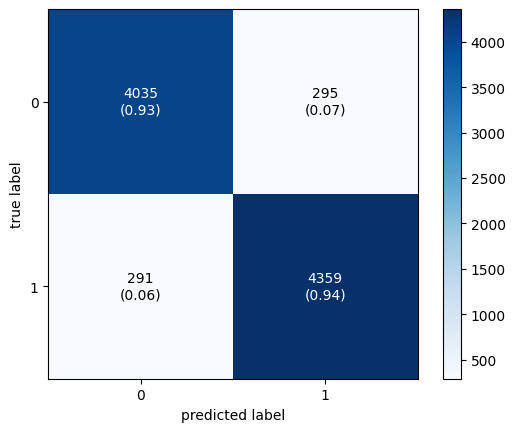

In [62]:
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat, show_normed=True, colorbar=True)

accscore = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, pos_label='Real', average='weighted')

print('The accuracy of prediction is {:.2f}%.\n'.format(accuracy*100))
print('The F1 score is {:.3f}.\n'.format(f1))